In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import mlflow

from configs import log
from configs.config import TrainTestPipelineConfig, LoggerConfig
from datapreprocessor.feature_engineer import FeatureEngineering

import logging
import os
from pathlib import Path
import datetime

from icecream import install, ic

from model_builder_trainer.tft_dfc_model import TFTDFCModel
from predict.predict import Predict

2023-02-04 18:04:30.680523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 18:04:30.829632: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-04 18:04:30.853168: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-04 18:04:31.328739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [5]:
from main import FusionForecast

In [4]:
config_list = ["./pipeline_config_TFT.yaml"]
logger_config_list = ["./pipeline_config_TFT.yaml"]

pipeline_config = TrainTestPipelineConfig(config_list)

In [6]:
forecast_obj = FusionForecast(pipeline_config)
forecast_obj.read_data()
forecast_obj.impute_missing()
forecast_obj.feature_engineer()

TFT -> feature_engineer.py:74 in check_inf_or_nan()- nans_in_col: 0
TFT -> feature_engineer.py:74 in check_inf_or_nan()- nans_in_col: 0
TFT -> feature_engineer.py:74 in check_inf_or_nan()- nans_in_col: 0


In [7]:
forecast_obj.data

SYSTEM  YEAR  QUANTILE_NORM  index  NEW_RESEARCHERS  \
0     Bio_Group  1989      -158.8750    494              664   
1    Pd-D_Group  1989      -158.8750    304              664   
2    Piez_Group  1989       -82.3750    532              664   
3      Ni_H_all  1989      -158.8750     38              664   
4      Piez_all  1989      -158.8750    228              664   
..          ...   ...            ...    ...              ...   
427    Pd-D_all  2015        74.0000     26               71   
428     Bio_all  2015       126.0625    216               71   
429   Bio_Group  2015       126.0625    520               71   
430    Ti-D_all  2015        11.8750    140               71   
431  Pd-D_Group  2015        25.8125    330               71   

     CUM_NO_RESEARCHERS  YES  NO  Y_AVG  X_NORM  ...  DIFUSION_COEFFICIENT  \
0                   664    0   0    0.0    0.00  ...                   0.0   
1                   664   29  47   38.0   81.00  ...                   2.4   
2                   664    0   0    0.0    0.00  ...                   0.0   
3                   664    0   1    0.5    0.25  ...                   5.2   
4                   664    5   0    0.0    0.00  ...                   0.0   
..                  ...  ...  ..    ...     ...  ...                   ...   
427                3251   19   0    9.5   90.25  ...                   2.4   
428                3251    1   0    0.5    0.25  ...                   0.0   
429                3251    1   0    0.5    0.25  ...                   0.0   
430                3251    1   0    0.5    0.25  ...                   3.2   
431                3251    9   0    4.5   20.25  ...                   2.4   

     SCREENING_POTENTIAL  REPRODUCIBILITY  DISCREPANCY  MEASUREMENT_FLAW  \
0                    0.0            0.000         0.00              0.00   
1                  800.0            0.001         1.00              0.95   
2                    0.0            0.000         0.00              0.00   
3                  380.0            0.001         1.00              0.95   
4                    0.0            0.000         0.00              0.00   
..                   ...              ...          ...               ...   
427                800.0            0.021         0.62              0.43   
428                  0.0            0.000         0.00              0.00   
429                  0.0            0.000         0.00              0.00   
430                150.0            0.021         0.62              0.43   
431                800.0            0.021         0.62              0.43   

     time_idx  METRIC  avg_QUANTILE_NORM_by_SYSTEM  QUANTILE_NORM_lagged_1  \
0           0       0                    -158.8750               -158.8750   
1           0   -1368                    -158.8750               -158.8750   
2           0       0                     -82.3750               -158.8750   
3           0      -1                    -158.8750                -82.3750   
4           0      25                    -158.8750               -158.8750   
..        ...     ...                          ...                     ...   
427        26     361                      74.0000                515.1250   
428        26       1                     126.0625                 74.0000   
429        26       1                     126.0625                126.0625   
430        26       1                      11.8750                126.0625   
431        26      81                      25.8125                 11.8750   

     QUANTILE_NORM_lagged_2  
0                 -158.8750  
1                 -158.8750  
2                 -158.8750  
3                 -158.8750  
4                  -82.3750  
..                      ...  
427                442.7500  
428                515.1250  
429                 74.0000  
430                126.0625  
431                126.0625  

[432 rows x 25 columns]

/tmp/ipykernel_98096/210820729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


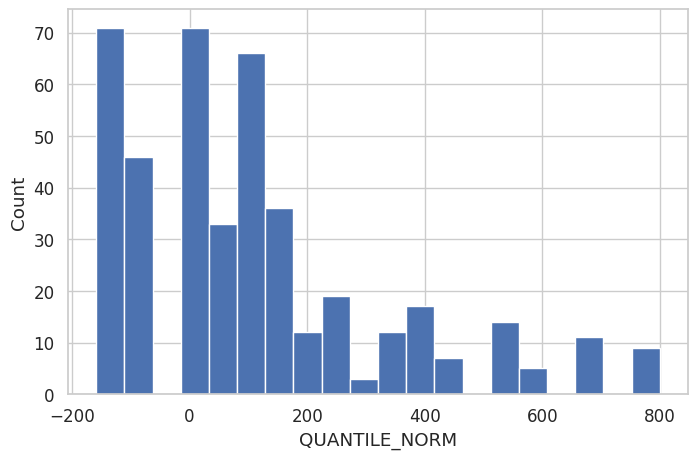

In [8]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    forecast_obj.data['QUANTILE_NORM'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='QUANTILE_NORM', ylabel='Count');

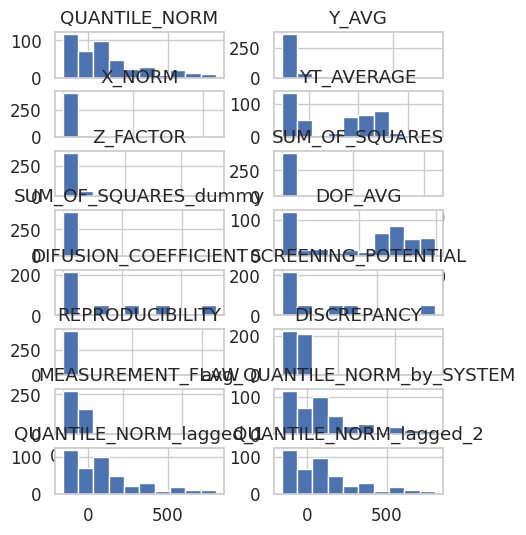

In [24]:
#numerical = forecast_obj.data.select_dtypes(include="float")
numerical = forecast_obj.data.loc[:, forecast_obj.data.dtypes == float]
#numerical.hist(bins=15, figsize=(15, 6), layout=(2, 4));
numerical.hist(figsize=(5, 6), layout=(8,2));

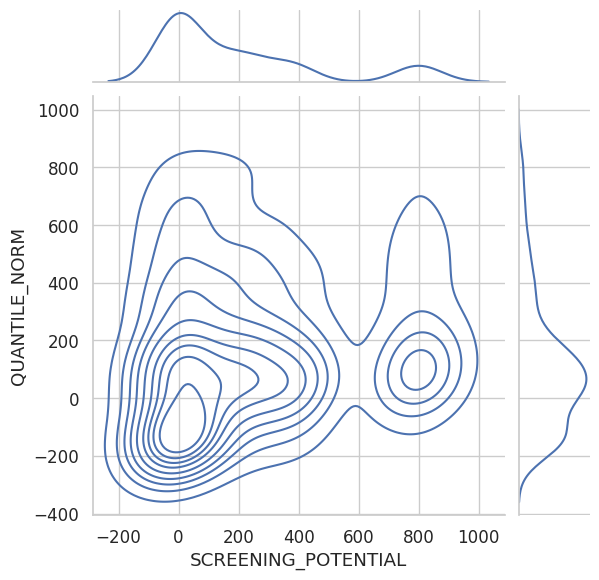

In [26]:
sns.jointplot(x="SCREENING_POTENTIAL", y="QUANTILE_NORM", data=forecast_obj.data, kind="kde")

<AxesSubplot:>

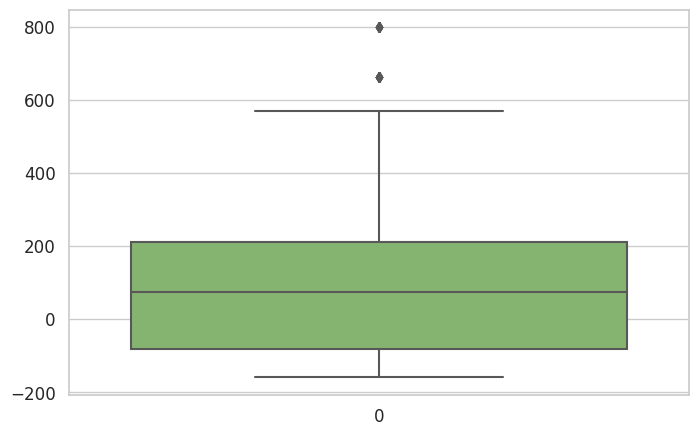

In [27]:
sns.boxplot(forecast_obj.data.QUANTILE_NORM, orient='v', palette='summer')

Why at 600 or 800 what does it signify?

<AxesSubplot:>

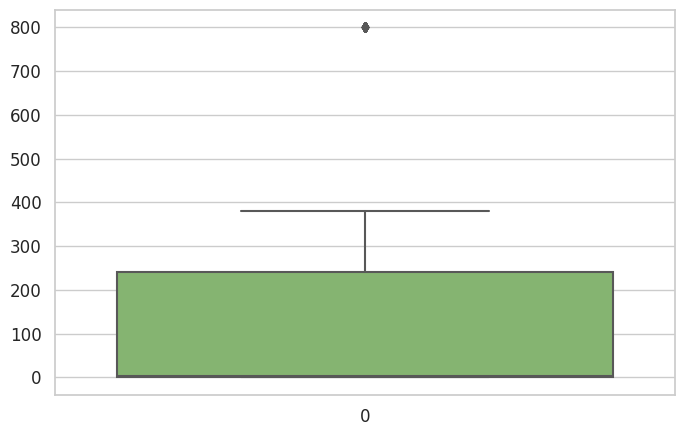

In [28]:
sns.boxplot(forecast_obj.data.SCREENING_POTENTIAL, orient='v', palette='summer')

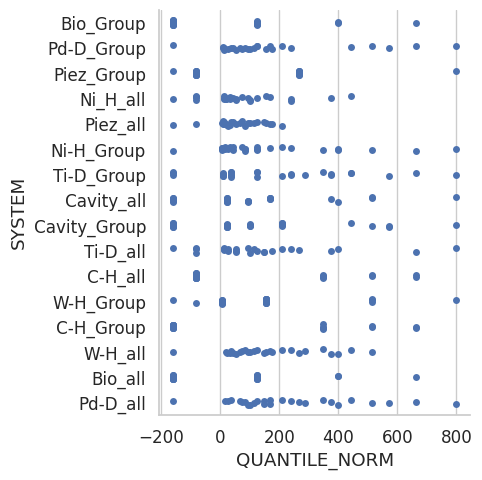

In [30]:
sns.catplot(x='QUANTILE_NORM', y = 'SYSTEM', data = forecast_obj.data)

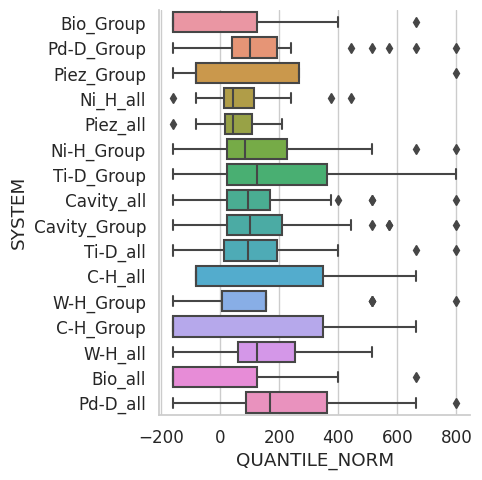

In [31]:
sns.catplot(x='QUANTILE_NORM', y = 'SYSTEM', data = forecast_obj.data, kind="box")

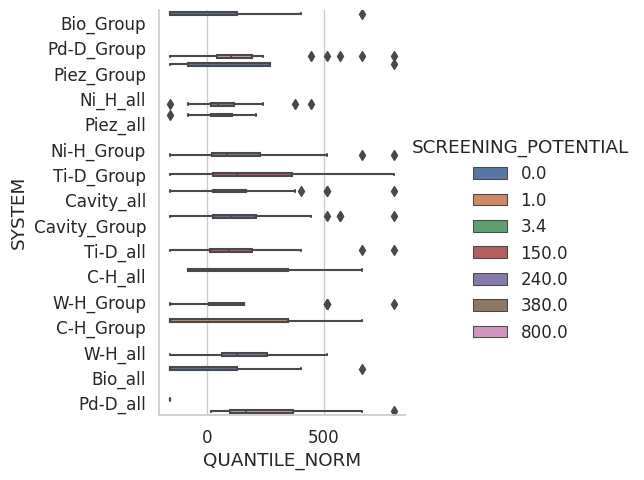

In [32]:
sns.catplot(x='QUANTILE_NORM', y = 'SYSTEM', data = forecast_obj.data, hue="SCREENING_POTENTIAL", kind="box")

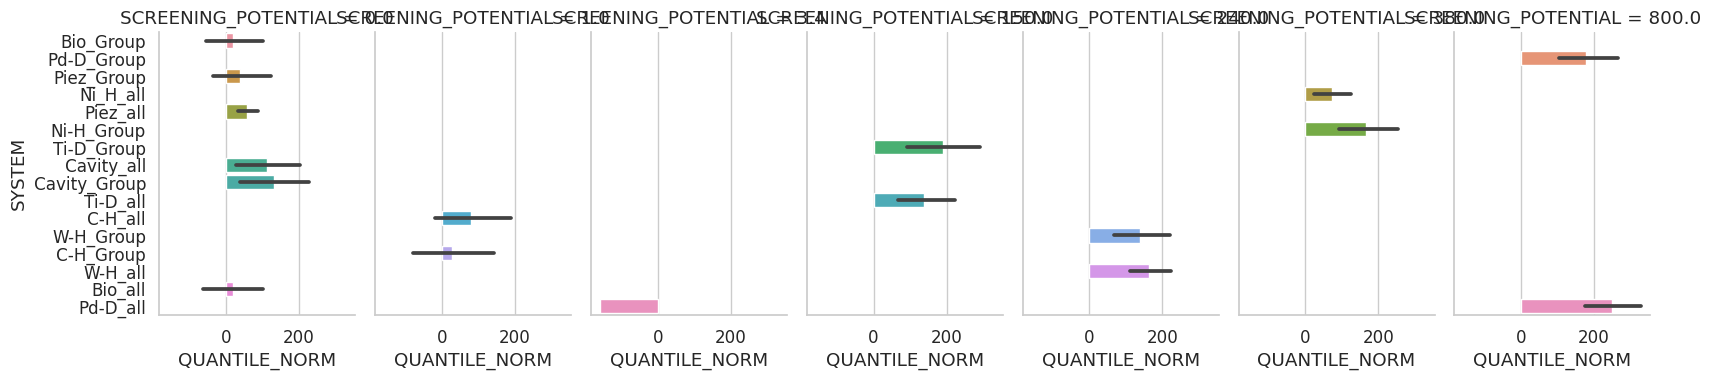

In [33]:
sns.catplot(
    x='QUANTILE_NORM', y = 'SYSTEM', data = forecast_obj.data, col="SCREENING_POTENTIAL",
    kind="bar", height=4, aspect=.6,
)


In [35]:
pd_d_all = forecast_obj.data.loc[forecast_obj.data["SYSTEM"]=="Pd-D_all"]
pd_d_all["SCREENING_POTENTIAL"].unique()

array([  3.4, 800. ])

/tmp/ipykernel_98096/2462702636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forecast_obj.data.corr())


<AxesSubplot:>

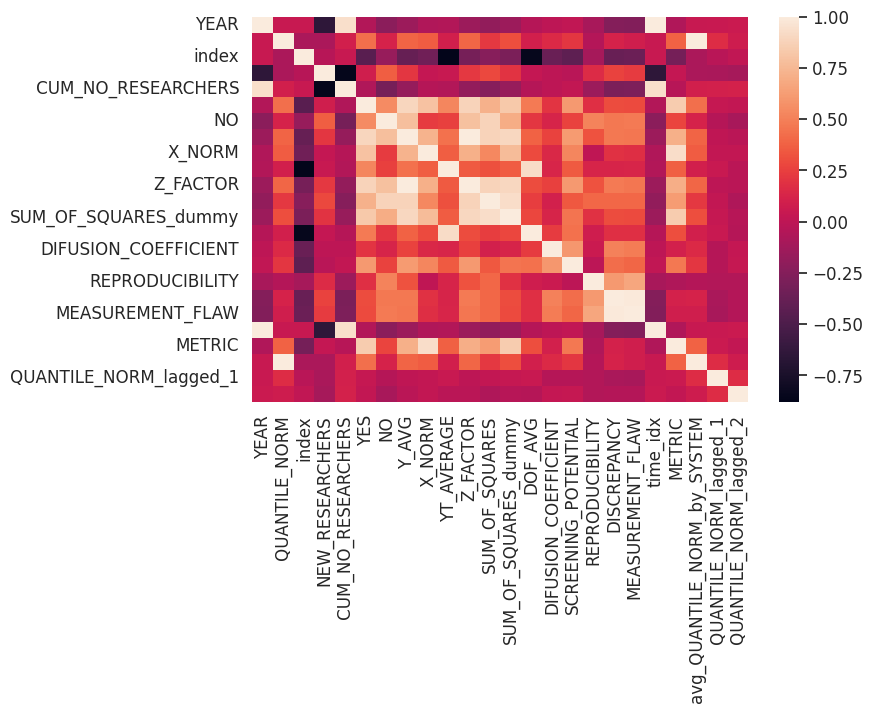

In [36]:
sns.heatmap(forecast_obj.data.corr())

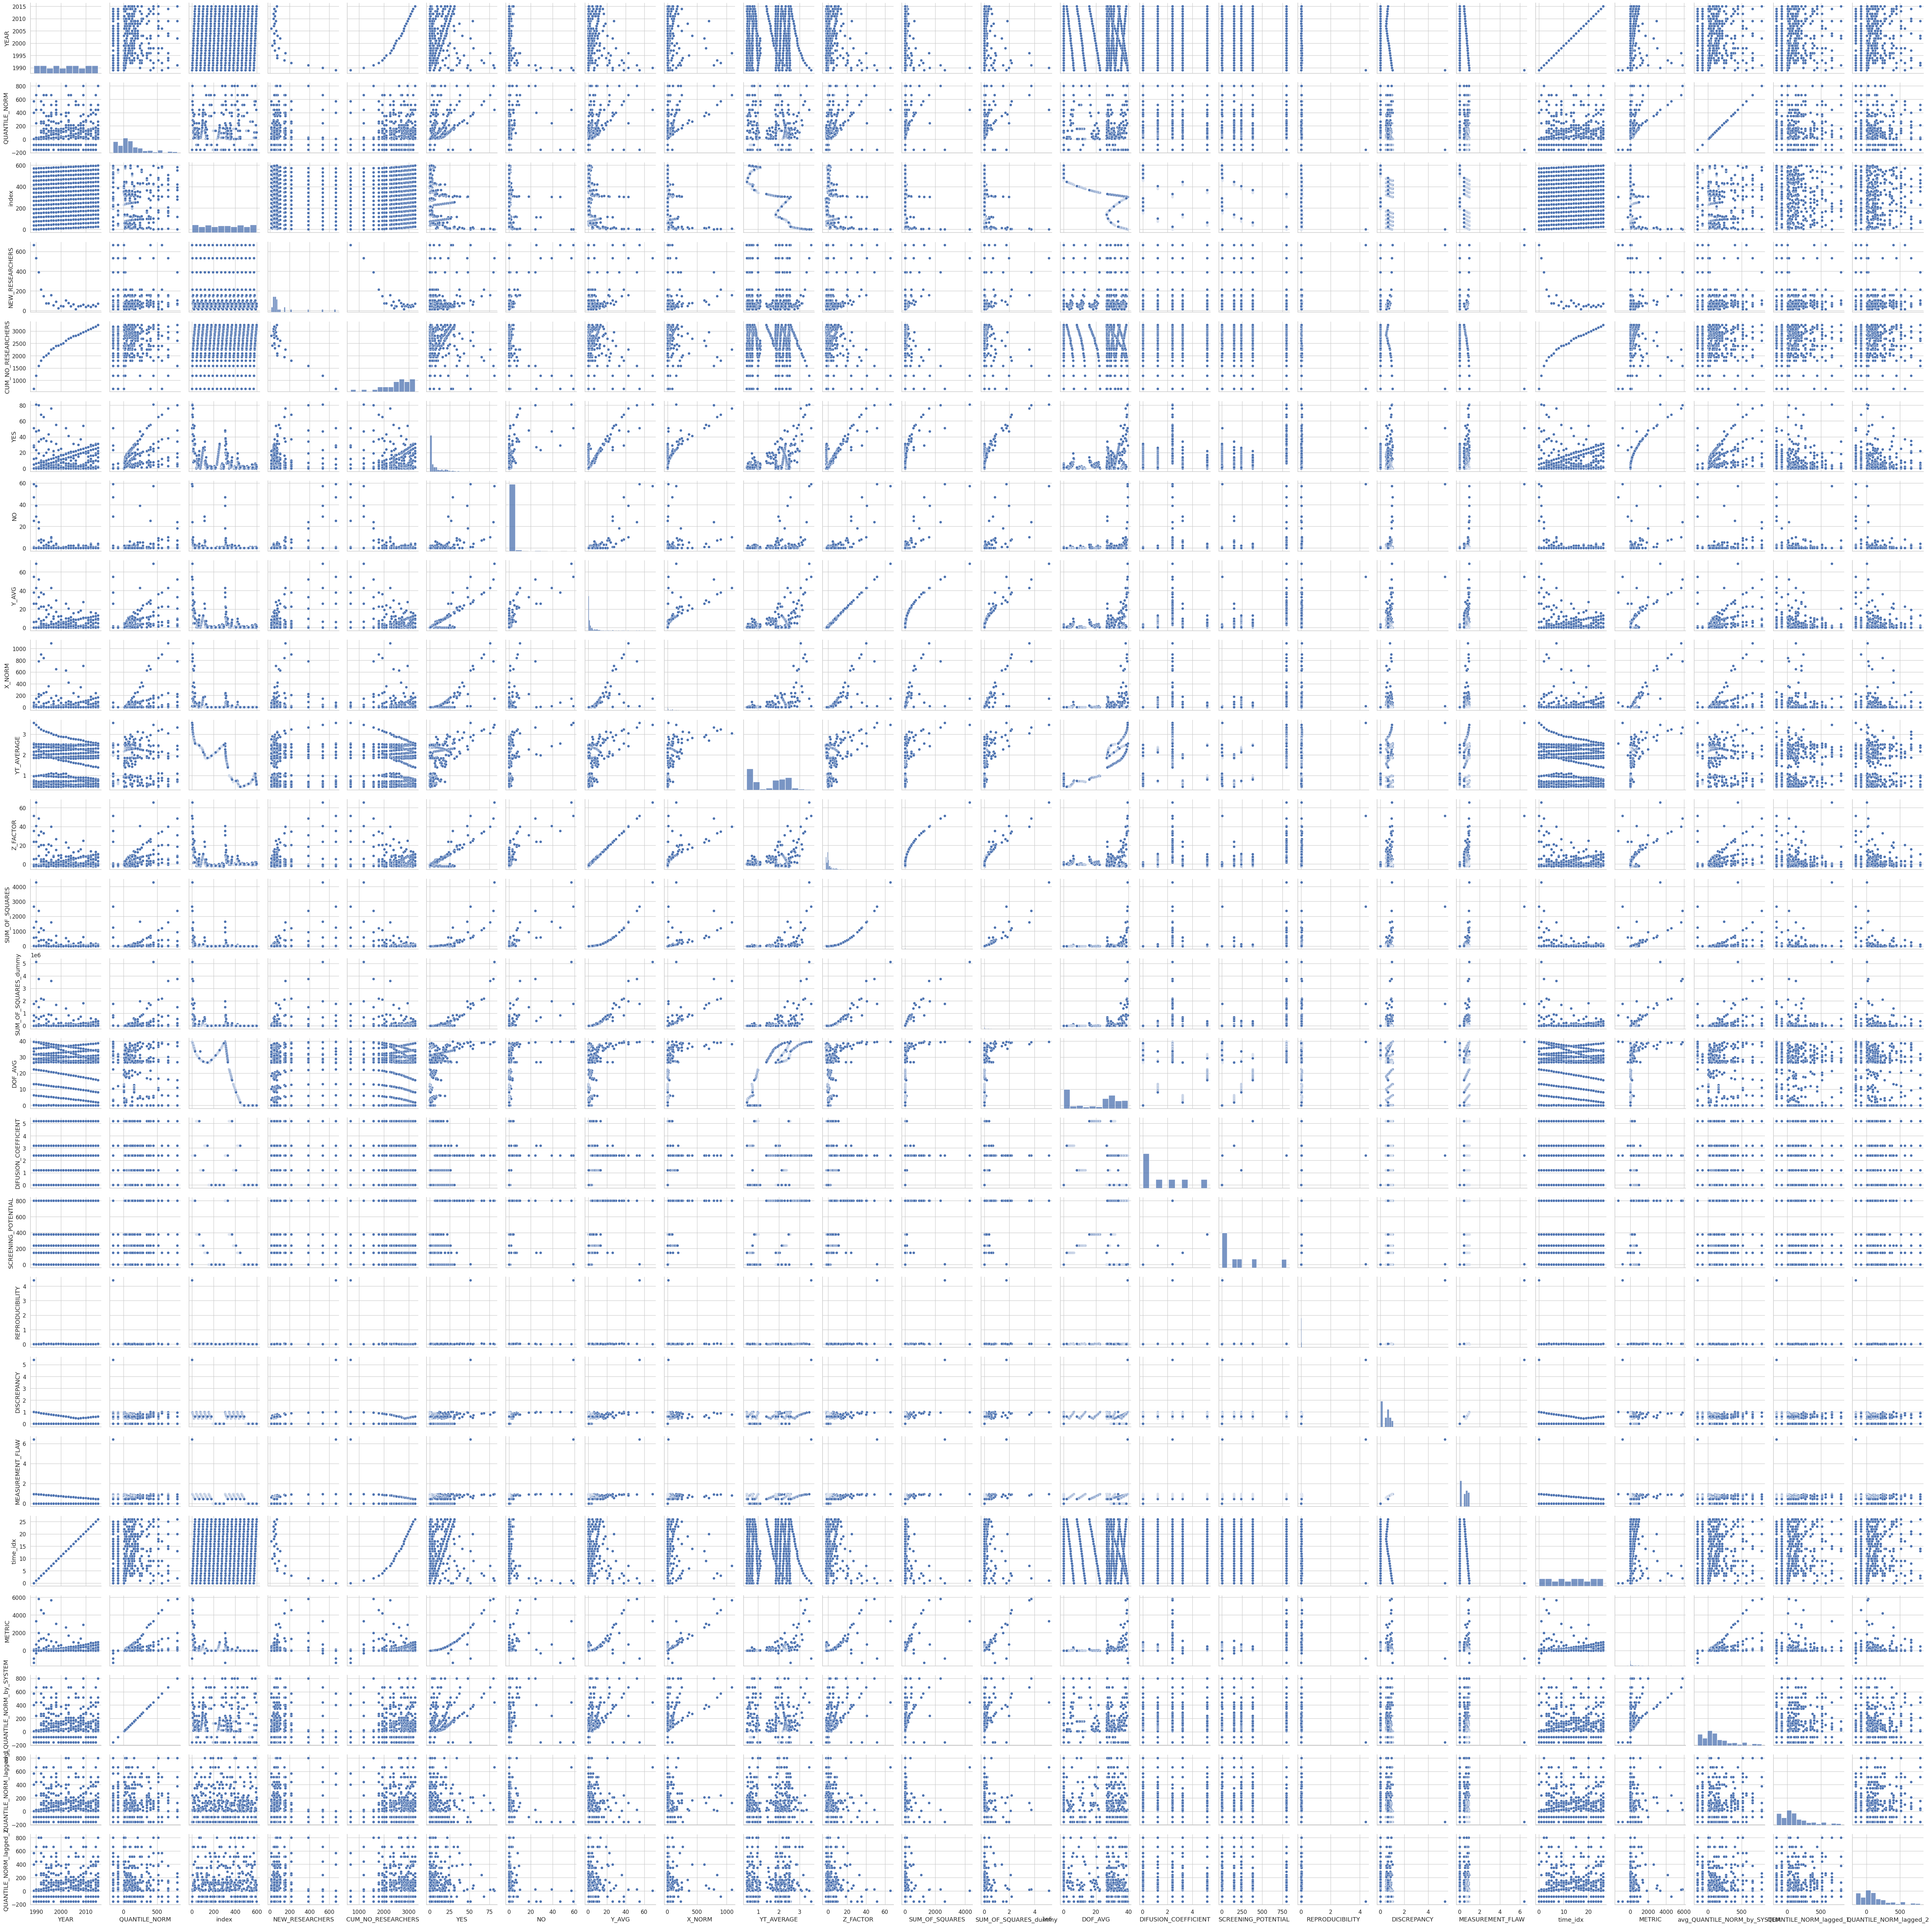

In [37]:
sns.pairplot(forecast_obj.data)